In [161]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn import ensemble, metrics
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
import math
from numpy import random
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib as mpl
from pandas import Series, DataFrame


In [162]:
# load data in

dataset = pd.read_csv('input/train_rm2.csv')
testset = pd.read_csv('input/test_rm2.csv')


In [163]:

# preprocessing of data

classcount1, classcount3, classcount2 = dataset['Y'].value_counts()

y1 = dataset[dataset['Y']==1] 
y2 = dataset[dataset['Y']==2] 
y3 = dataset[dataset['Y']==3] 


In [164]:
# oversample y2, y3

y2_oversample = y2.sample(classcount1, replace=True)
y3_oversample = y3.sample(classcount1, replace=True)

# append dataframe

dataset_oversample = pd.DataFrame(y1)
dataset_oversample = dataset_oversample.append(y2_oversample)
dataset_oversample = dataset_oversample.append(y3_oversample)

/var/folders/yv/0fxd8k0d0w7fn1h5v3_k46x80000gn/T/ipykernel_5812/701090111.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset_oversample = dataset_oversample.append(y2_oversample)
/var/folders/yv/0fxd8k0d0w7fn1h5v3_k46x80000gn/T/ipykernel_5812/701090111.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset_oversample = dataset_oversample.append(y3_oversample)


In [165]:
# shuffle data and assign variable

dataset_oversample = shuffle(dataset_oversample)
label = dataset_oversample.Y

# drop ID
dataset_oversample = dataset_oversample.drop('ID', axis=1)
testset = testset.drop('ID', axis=1)
dataset_oversample = dataset_oversample[dataset_oversample.columns[:34]]

kfold = KFold(n_splits = 20, shuffle = True)
predicted = []
expected = []

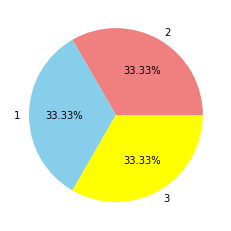

In [166]:
label.value_counts().plot(kind='pie', colors=['lightcoral', 'skyblue', 'yellow'], autopct = '%1.2f%%')
plt.title('')
plt.ylabel('')
plt.show()

In [167]:
for train, test in kfold.split(dataset_oversample):
    x_train = dataset_oversample.iloc[train]
    y_train = label.iloc[train]
    x_test = dataset_oversample.iloc[test]
    y_test = label.iloc[test]
    forest = ensemble.RandomForestClassifier(n_estimators= 250, max_depth=8)
    forest = forest.fit(x_train,y_train)
    expected.extend(y_test)
    predicted.extend(forest.predict(x_test))

In [168]:
print("Macro-average: {0}".format(metrics.f1_score(expected,predicted,average='macro')))
print("Micro-average: {0}".format(metrics.f1_score(expected,predicted,average='micro')))
print(metrics.classification_report(expected,predicted))
print(metrics.confusion_matrix(expected, predicted))
accuracy = accuracy_score(expected, predicted)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

print("Average = macro")
print('precision:',metrics.precision_score(expected, predicted,average='macro')) 
print('recall:',metrics.recall_score(expected, predicted,average='macro'))
print('F1-score:',metrics.f1_score(expected, predicted,labels=[1,2,3],average='macro'))

print("\n")
print("Average = micro")
print('precision:', metrics.precision_score(expected, predicted, average='micro')) 
print('recall:',metrics.recall_score(expected, predicted,average='micro'))
print('F1-score:',metrics.f1_score(expected, predicted,labels=[1,2,3],average='micro'))

print("\n")
print("Average = weighted")
print('precision:', metrics.precision_score(expected, predicted, average='weighted'))
print('recall:',metrics.recall_score(expected, predicted,average='weighted'))
print('F1-score:',metrics.f1_score(expected,predicted,labels=[1,2,3],average='weighted'))


Macro-average: 0.7038470571999818
Micro-average: 0.7155504234026174
              precision    recall  f1-score   support

           1       0.65      0.44      0.53      1732
           2       0.90      1.00      0.95      1732
           3       0.58      0.70      0.64      1732

    accuracy                           0.72      5196
   macro avg       0.71      0.72      0.70      5196
weighted avg       0.71      0.72      0.70      5196

[[ 769   98  865]
 [   0 1732    0]
 [ 415  100 1217]]
Accuracy: 71.56%
Average = macro
precision: 0.7104788904977606
recall: 0.7155504234026173
F1-score: 0.7038470571999818


Average = micro
precision: 0.7155504234026174
recall: 0.7155504234026174
F1-score: 0.7155504234026174


Average = weighted
precision: 0.7104788904977607
recall: 0.7155504234026174
F1-score: 0.7038470571999818


In [169]:
parameters = {
    "n_estimators":[5,10,50,100,250],
    "max_depth":[2,4,8,16,32,None]
    
}

In [170]:
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(forest,parameters,cv=5)
cv.fit(dataset_oversample, label.values.ravel())

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=8, n_estimators=250),
             param_grid={'max_depth': [2, 4, 8, 16, 32, None],
                         'n_estimators': [5, 10, 50, 100, 250]})

In [156]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [157]:
display(cv)

Best parameters are: {'max_depth': 8, 'n_estimators': 50}


0.658 + or -0.025 for the {'max_depth': 2, 'n_estimators': 5}
0.67 + or -0.034 for the {'max_depth': 2, 'n_estimators': 10}
0.692 + or -0.02 for the {'max_depth': 2, 'n_estimators': 50}
0.69 + or -0.019 for the {'max_depth': 2, 'n_estimators': 100}
0.689 + or -0.014 for the {'max_depth': 2, 'n_estimators': 250}
0.692 + or -0.015 for the {'max_depth': 4, 'n_estimators': 5}
0.705 + or -0.011 for the {'max_depth': 4, 'n_estimators': 10}
0.707 + or -0.01 for the {'max_depth': 4, 'n_estimators': 50}
0.717 + or -0.013 for the {'max_depth': 4, 'n_estimators': 100}
0.71 + or -0.011 for the {'max_depth': 4, 'n_estimators': 250}
0.704 + or -0.013 for the {'max_depth': 8, 'n_estimators': 5}
0.707 + or -0.013 for the {'max_depth': 8, 'n_estimators': 10}
0.721 + or -0.01 for the {'max_depth': 8, 'n_estimators': 50}
0.719 + or -0.01 for the {'max_depth': 8, 'n_estimators': 100}
0.715 + or -0.013 for the {'max_depth': 8, 'n_estimators': 250}

In [158]:
forest.feature_importances_ # 27 28 31 32 # 

array([4.79488497e-03, 3.11389515e-02, 2.24147920e-02, 9.43166877e-02,
       3.02058747e-03, 6.24802797e-02, 8.99536853e-03, 1.33117870e-03,
       6.31010129e-04, 4.91344213e-03, 2.73191338e-04, 1.42823817e-02,
       1.02158734e-03, 1.68454587e-02, 3.54115406e-04, 6.20275213e-03,
       3.43258721e-04, 4.56733230e-03, 4.21528025e-03, 6.46303956e-03,
       2.41069542e-04, 5.51365040e-03, 3.17997218e-01, 5.57492545e-03,
       5.48708451e-04, 2.55946946e-03, 4.54627530e-03, 1.94755995e-02,
       2.22386163e-02, 4.06292615e-02, 5.71716940e-03, 5.74343364e-02,
       3.53685975e-02, 1.93549523e-01])

In [160]:
result = forest1.predict_proba(testset)

c1 = []
c2 = []
c3 = []
for i in range(300):
    c1.append(result[i][0])
    c2.append(result[i][1])
    c3.append(result[i][2])


# submission

id = []
for i in range(1,301):
    id.append(i)

submission = pd.DataFrame({
    "ID": id,
    "C1": c1,
    "C2": c2,
    "C3": c3,
})
submission.to_csv('input/result3.csv', index=False)


/Users/sean/opt/miniconda3/envs/py38/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- T15
- T16
- T17
- T20
- T21
- ...

  warnings.warn(message, FutureWarning)


ValueError: X has 34 features, but RandomForestClassifier is expecting 41 features as input.